
# Regresión lineal con Python

Su vecino es un agente de bienes raices y desea que lo ayude en la predicción de precios de casas para regiones en Guatemala. Sería excelente si se pudiera crear un moldel que le permitiera ingresar algunas características de una casa y que este le devolviera una estimación del precio de venta de la casa.

Le ha pedido a Ud si le puede ayudar con sus nuevas destrezas de Data Science.  Ud acepta y decide que una regresión lineal puede ser una buena forma de resolver el problema.

Su vecino le da alguna información de un grupo de casas en diferentes regiones de Guatemala, todo se encuentra en el archivo:  Guate_casas.csv.



El archivo contiene las siguientes columnas:

* 'Prom. Ingresos Area':  Promedio de ingresos de los residentes en la ciudad donde se encuentra la casa.
* 'Prom. Edad Casa':  Edad promedio de las casas en la misma ciudad.
* 'Prom. Numero habitaciones':  Número promedio de habitaciones para casas en la misma ciudad.
* 'Prom. numero dormitorios':  Número promedio de dormitorios para casas en la misma ciudad. 
* 'Poblacion ciudad':  Población de la ciudad donde se encuebtra la casa.
* 'Precio':  Precio en que se vendió la casa
* 'Direccion?:  Dirección de la casa

**Empecemos!**

### Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Revisar los datos

In [2]:
casas = pd.read_csv('Guate_casas.csv')

In [3]:
casas.head()

,Prom Ingresos Area,Prom. Edad Casa,Prom. Numero habitaciones,Prom. Numero dormitorios,Poblacion ciudad,Precio,Direccion
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NaN
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,NaN
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,NaN
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,NaN
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,NaN


In [4]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Prom Ingresos Area         5000 non-null   float64
 1   Prom. Edad Casa            5000 non-null   float64
 2   Prom. Numero habitaciones  5000 non-null   float64
 3   Prom. Numero dormitorios   5000 non-null   float64
 4   Poblacion ciudad           5000 non-null   float64
 5   Precio                     5000 non-null   float64
 6   Direccion                  0 non-null      float64
dtypes: float64(7)
memory usage: 273.6 KB


In [5]:
casas.describe()

,Prom Ingresos Area,Prom. Edad Casa,Prom. Numero habitaciones,Prom. Numero dormitorios,Poblacion ciudad,Precio,Direccion
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,0.0
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,NaN
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,NaN
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,NaN
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,NaN
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,NaN
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,NaN
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06,NaN


In [6]:
casas.columns

Index(['Prom Ingresos Area', 'Prom. Edad Casa', 'Prom. Numero habitaciones',
       'Prom. Numero dormitorios', 'Poblacion ciudad', 'Precio', 'Direccion'],
      dtype='object')

# EDA (Análisis exploratorio de datos)

Crearemos algunas gráficas simples para visualizar los datos!

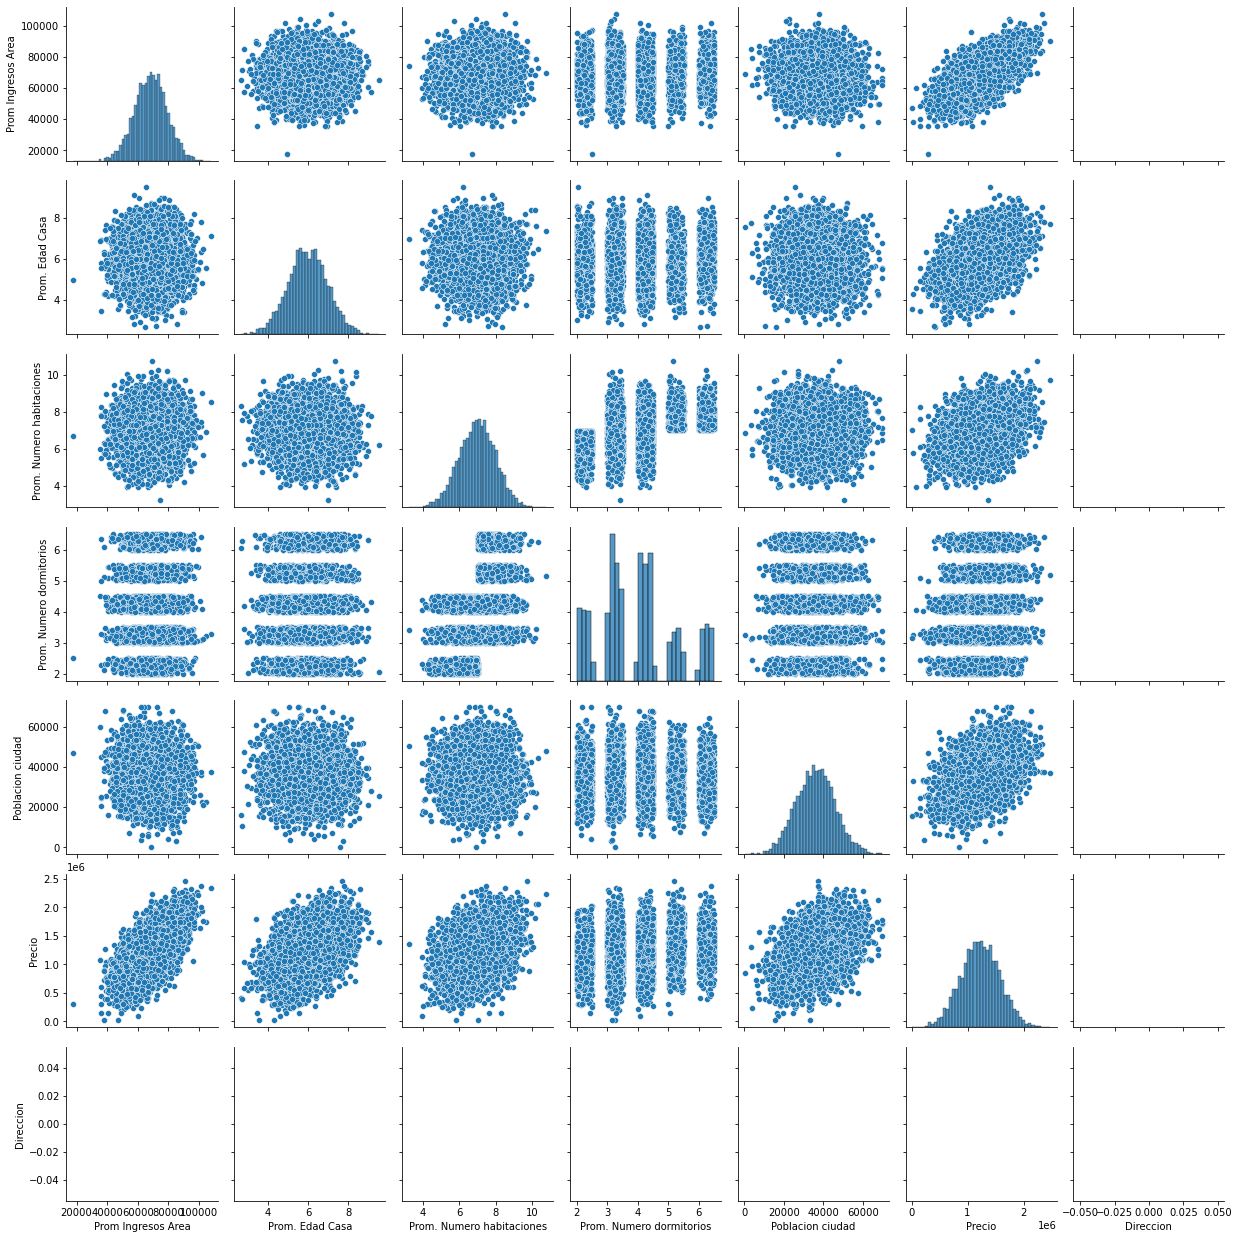

In [7]:
sns.pairplot(casas)

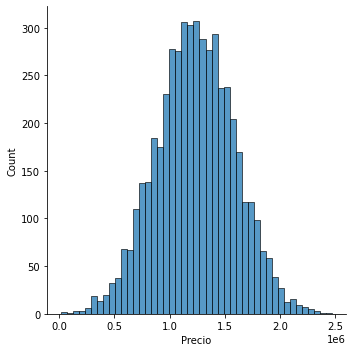

In [10]:
sns.displot(casas['Precio'])

<AxesSubplot:>

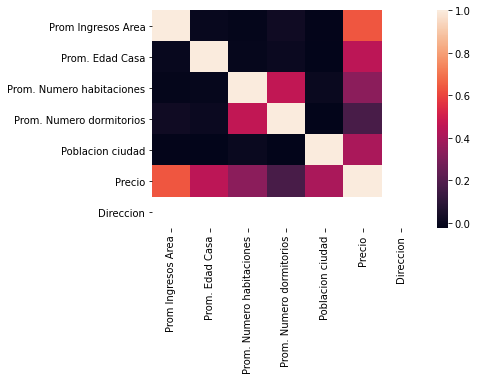

In [11]:
sns.heatmap(casas.corr())

<AxesSubplot:>

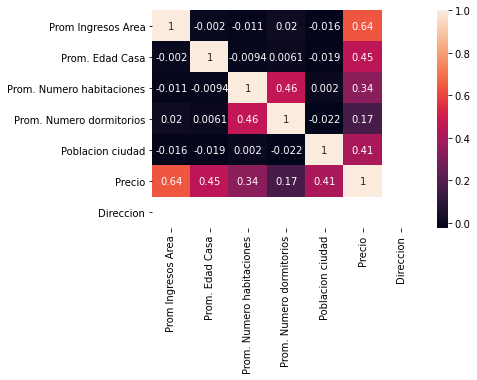

In [12]:
sns.heatmap(casas.corr(), annot = True)

## Entenamiento de un modelo de Regresión Lineal

Empezamos el entrenamiento del modelo!  Necesitaremos, primero partir nuestros datos en un arreglo X que contenga las variables con las cuales se hará el entrenamiento, y un arrego y con la variable meta (target), en este caso la columna de precio.  Descartaremos la columna de dirección porque solo contiene texto que no sirve para el modelp de regresión.

### Arreglos X e y 

In [13]:
casas.columns

Index(['Prom Ingresos Area', 'Prom. Edad Casa', 'Prom. Numero habitaciones',
       'Prom. Numero dormitorios', 'Poblacion ciudad', 'Precio', 'Direccion'],
      dtype='object')

In [14]:
X = casas[['Prom Ingresos Area', 'Prom. Edad Casa', 'Prom. Numero habitaciones',
       'Prom. Numero dormitorios', 'Poblacion ciudad']]
y = casas['Precio']

## División Entrenamiento-Prueba (Train Test Split)

Ahora dividimos los datos en un conjunto para entrenamiento y otro para hacer una pruueba.  Se entrenará el modelo con el conjunto para entrenamiento y luego usaremos el conjunto de prueba para evaluar el modelo.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Crear el modelo y entrenarlo

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

## Evaluación del modelo

Evaluemos el modelo por medio de la revisión de sus coeficientes y cómo los podemos interpretar.

In [20]:
# imprimir la intercepción (constante)
print(lm.intercept_)

-2640159.7968519097


In [21]:
coeficientes = pd.DataFrame(lm.coef_, X.columns, columns=['Coeficiente'])
coeficientes

,Coeficiente
Prom Ingresos Area,21.528276
Prom. Edad Casa,164883.282027
Prom. Numero habitaciones,122368.678027
Prom. Numero dormitorios,2233.801864
Poblacion ciudad,15.150420


Interpretación de los coeficientes:

- Si mantenemos todo lo demás fijo, un incremento unitario en **Prom. Ingresos Area** se asocia con un **incremento de Q21.52**.
- Si mantenemos todo lo demás fijo, un incremento unitario en **Prom. Edad Casa** se asocia con un **incremento de Q164883.28**.
- Si mantenemos todo lo demás fijo, un incremento unitario en **Prom. numero habitaciones** se asocia con un **incremento de Q122368.67**.
- Si mantenemos todo lo demás fijo, un incremento unitario en **Prom. numero dormitorios** se asocia con un **incremento de Q2233.80**.
- Si mantenemos todo lo demás fijo, un incremento unitario en **Poblacion ciudad** se asocia con un **incremento de Q15.15**.

Que si hacen sentido estos datos?  Probablemente no porque estos datos fueron inventados.  Si desean datos reales para repetir este análisis, puede ver  [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html): 


    from sklearn.datasets import load_boston
    casas_boston = load_boston()
    print(casas_boston.DESCR)
    boston = casas_boston.data

## Predicciones de nuestro modelo

Obtengamos las predicciones de nuestr conjunto de pruebas y veamos cómo nos fue!

In [22]:
predicciones = lm.predict(X_test)

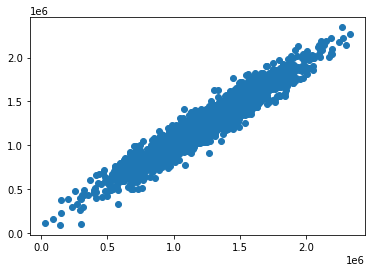

In [23]:
plt.scatter(y_test,predicciones)

**Histograma de los residuos**

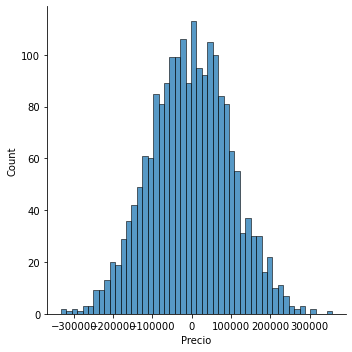

In [28]:
sns.displot((y_test - predicciones),bins=50);

## Métricas para la evaluación de regresiones

Las tres métricas más comunes para los problemas de regresión son:

**Error Absoluto Medio - Mean Absolute Error** (MAE) es la media del vañor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error Cuadrado Medio - Mean Squared Error** (MSE) es la media de los errores cuadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raís del Error Cuadrado Medio - Root Mean Squared Error** (RMSE) es la raíz cuadrada de la media de los errores cuadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** es la más fácil de comprender porque es el error promedio.
- **MSE** es más popular que el MAE, porque el MSE "castiga" los errores más grandes, que tiende a ser útil en en mundo real.
- **RMSE** es aún más popular que MSE, porque el RMSE es interpretable en las unidades de "y".

Todas estas son  **funciones de pérdida (loss functions)**, porque queremos minimizarlos.

In [26]:
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE: 82288.22251914954
MSE: 10460958907.209494
RMSE: 102278.82922291149


Este ha sido nuestro primer proyecto real de Aprendizaje de Máquina (Machine Learning)! Felicitaciones en ayudar a su vecino! Lo dejaremos aquí por ahora, pero adelante y explore el conjunto de datos Boston si le es de interés! 

## Buen trabajo!